###  Import libraries

In [8]:
import math, time, random, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)

### Import dataset

In [9]:
df = pd.read_csv("IBM-HR-Employee-Attrition.csv")

### Explore data

In [10]:
pd.set_option('display.max_columns', None)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
df.shape

(1470, 35)

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
#Datatype and Null/Not null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
# Correlation between variables

rs = np.random.RandomState(0)
df1 = pd.DataFrame(rs.rand(34, 34))
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1.000000,0.050326,-0.241929,0.039133,0.017914,0.090833,-0.258751,0.192205,-0.319421,-0.097992,0.282171,-0.180823,0.159754,0.083735,0.061236,0.095535,0.173101,0.046069,-0.016589,-0.124536,0.206197,0.093181,-0.184592,0.344584,0.042235,-0.024625,0.418046,-0.296393,-0.066663,-0.076735,0.462179,0.216666,-0.335681,0.312411
1,0.050326,1.000000,-0.087554,0.136140,-0.123837,-0.107103,-0.321200,0.088563,0.052180,0.009988,0.100046,0.130120,0.006830,0.174570,-0.046723,0.017344,0.076300,0.122353,0.010051,0.076524,0.291752,-0.323046,0.120208,-0.080818,-0.085341,-0.186807,0.255502,0.201050,0.134551,0.051072,-0.254114,-0.141761,-0.107801,-0.169496
2,-0.241929,-0.087554,1.000000,0.004578,0.065560,0.019825,0.023216,-0.405959,0.251611,0.033796,-0.048466,0.007051,-0.057291,-0.044533,-0.381147,0.129289,0.148562,-0.171256,-0.111904,0.049352,-0.136342,0.290754,-0.092335,-0.096181,-0.195994,0.291622,-0.107853,0.076648,0.051484,-0.058242,-0.011950,-0.243090,-0.041585,-0.055575
3,0.039133,0.136140,0.004578,1.000000,-0.023340,0.363603,0.159304,0.010827,-0.034908,-0.067525,0.406453,-0.020098,-0.112178,-0.256563,0.248663,-0.154771,-0.108546,0.155398,-0.083267,0.062728,-0.148325,-0.005586,-0.133585,-0.009779,-0.273226,-0.122290,0.079051,0.157263,-0.256612,0.116343,-0.004014,-0.355583,-0.094445,0.073307
4,0.017914,-0.123837,0.065560,-0.023340,1.000000,0.211009,-0.038103,0.133120,-0.098610,0.077272,0.046545,-0.244441,-0.238895,-0.261769,0.114474,0.316079,-0.079446,0.128107,0.061885,-0.152817,-0.049208,0.079400,0.209294,-0.182548,-0.001279,0.243283,0.080680,0.009835,0.283392,0.084954,-0.147076,-0.049629,0.205125,-0.152274
5,0.090833,-0.107103,0.019825,0.363603,0.211009,1.000000,0.188897,0.414502,0.045108,0.157211,0.319023,-0.191112,-0.109756,-0.181556,-0.012450,0.031641,0.079660,0.192111,-0.170793,-0.321329,-0.183024,0.154739,0.055504,-0.251482,-0.384786,-0.095497,0.021621,-0.181847,0.191322,-0.144562,0.073603,0.082135,0.096828,0.099712
6,-0.258751,-0.321200,0.023216,0.159304,-0.038103,0.188897,1.000000,0.012731,0.055157,0.076369,-0.261844,-0.174246,-0.122890,-0.201688,0.237364,0.013040,-0.120390,0.013920,-0.072688,0.189982,-0.148324,0.361889,0.078198,-0.199516,0.180830,0.168574,0.058496,-0.002861,-0.170042,-0.020809,0.094980,0.003628,0.163576,-0.029114
7,0.192205,0.088563,-0.405959,0.010827,0.133120,0.414502,0.012731,1.000000,-0.061275,0.296969,0.112048,0.103203,0.131464,-0.137082,0.227881,-0.004196,0.082086,0.308819,0.028561,-0.167552,0.217118,0.009954,-0.040633,-0.179841,-0.264760,-0.238663,0.032500,0.114697,0.070455,0.051412,-0.052413,0.263638,0.249695,0.049044
8,-0.319421,0.052180,0.251611,-0.034908,-0.098610,0.045108,0.055157,-0.061275,1.000000,-0.228892,0.165552,-0.141956,0.029486,-0.020737,-0.265719,-0.149641,-0.321293,-0.258337,-0.179743,0.551570,-0.243837,0.017119,0.182277,-0.059535,-0.056720,0.074607,-0.045633,-0.054517,0.064005,0.151495,-0.447777,0.150417,-0.041115,-0.361114
9,-0.097992,0.009988,0.033796,-0.067525,0.077272,0.157211,0.076369,0.296969,-0.228892,1.000000,0.073966,0.075785,0.037642,-0.091196,0.012405,0.139587,0.237160,0.024449,-0.120524,0.036392,0.018312,0.126387,0.101059,-0.142614,-0.057572,-0.231848,0.185080,0.256225,0.297693,0.228797,0.119057,-0.071162,0.291193,0.067512


In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
# drop the unnecessary columns
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [17]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [18]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

### Overall Attrition rate

In [19]:
df['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [20]:
len(df)

1470

In [21]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


### Distribution of categorical variables

In [22]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    #(df[col_name].value_counts()/len(df)).plot.bar(cmap='Set2',ax=ax[0])
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(col_name, hue='Attrition',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

In [23]:
# def count_plot(df,var1,var2,size):
#     df=df1.copy()
#     order = df[var1].value_counts(ascending = False).index
#     sns.set()
#     sns.set(rc = {"figure.fisize":(size,size)})
#     ax = sns.countplot(x=var1,hue=var2,data=df,order=order)
#     ax.set(ylabel ='Count' , title = 'Percent of total')
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right',fontsize =15)
#     df.rename(columns = {var2:'var2'},inplace = True)
#     for c in ax.containers:
#         labels = [f'{h/df.var2.count()*100:0.1f}%' if(h := v.get_height()) >0 else '' for v in c]
#         #labels = [f'{h/df.var2.count()*100:.0f}%' if (w := v.get_width()) > 0 else '' for v in c ]
#         ax.bar_label(c,labels =labels ,label_type = 'edge')  
                  
#     return plt.show()              

In [24]:
# count_plot(df,'BusinessTravel','Attrition',6)

In [25]:
# df2=df.copy()
# #print(df2.head(2))
# order = df2['BusinessTravel'].value_counts(ascending = False).index
# sns.set()
# #sns.set(rc = {"figure.fisize":(size,6)})
# ax = sns.countplot(x='BusinessTravel',hue='Attrition',data=df2,order=order)
# ax.set(ylabel ='Count' , title = 'Percent of total')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right',fontsize =15)
# #df2.rename(columns = {var2:'Attritio'},inplace = True)
# labels=
# labels = [f'{h/df.Attrition.count()*100:0.1f}%' if(h := v.get_height()) >0 else '' for v in c]
# #labels = [f'{h/df.var2.count()*100:.0f}%' if (w := v.get_width()) > 0 else '' for v in c ]
# ax.bar_label(c,labels =labels ,label_type = 'edge')  
         

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


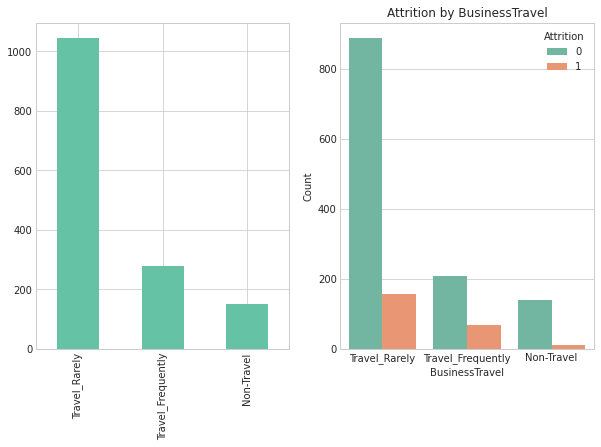

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
categorical_column_viz('BusinessTravel')

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


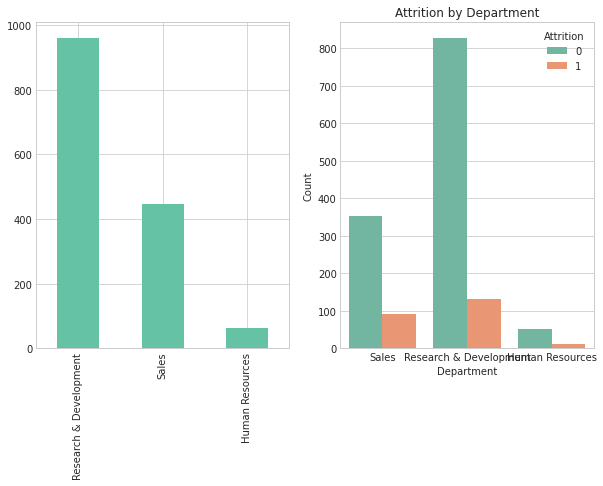

In [28]:

categorical_column_viz('Department')

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


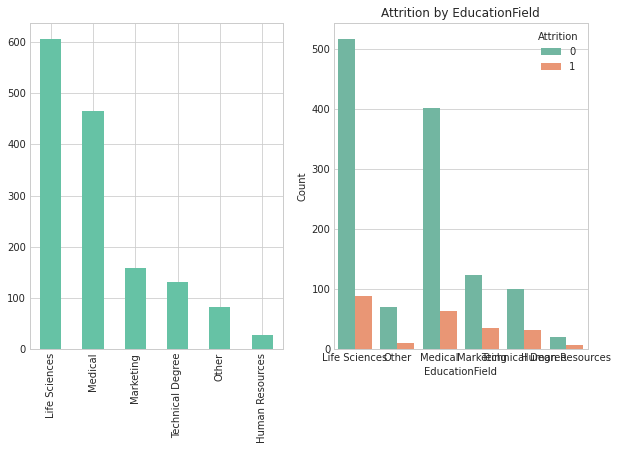

In [29]:
categorical_column_viz('EducationField')

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


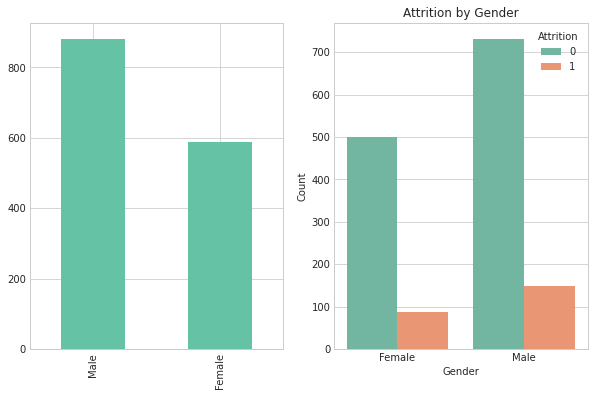

In [30]:
categorical_column_viz('Gender')

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


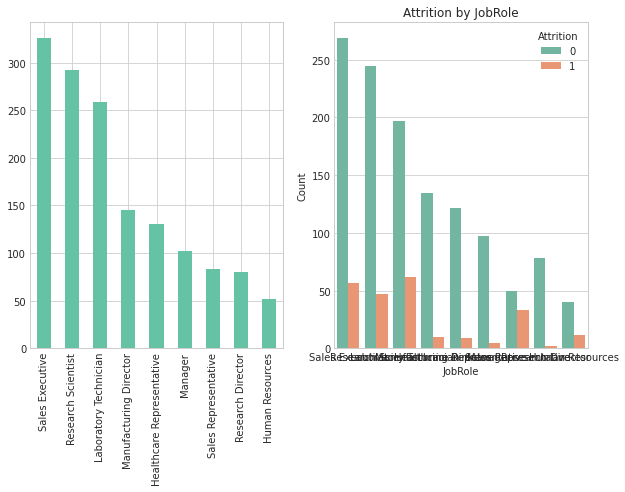

In [31]:
categorical_column_viz('JobRole')

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


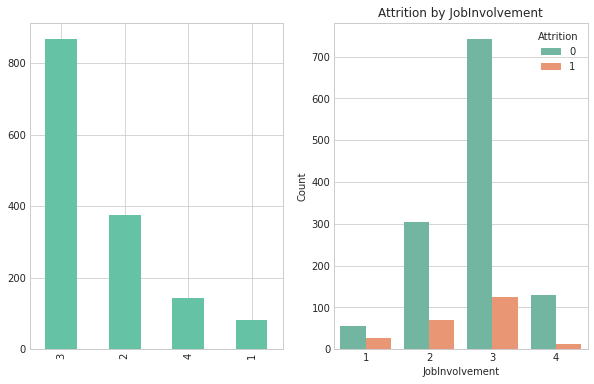

In [32]:
categorical_column_viz('JobInvolvement')


/usr/local/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


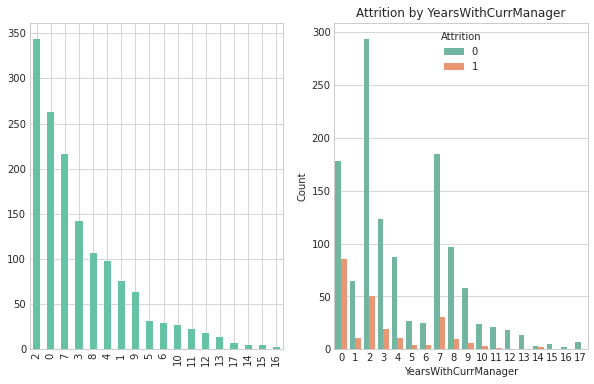

In [33]:
categorical_column_viz('YearsWithCurrManager')


### Distribution of numeric variables

In [34]:
def numerical_column_viz(col_name):

    sns.boxplot(y=col_name, x='Attrition',data=df, palette='Set3')

In [35]:
df.columns

# ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
#        'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
#        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
#        'YearsSinceLastPromotion', 'YearsWithCurrManager']


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

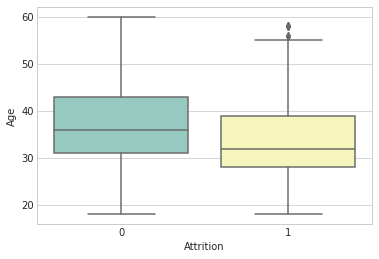

In [36]:
numerical_column_viz('Age')

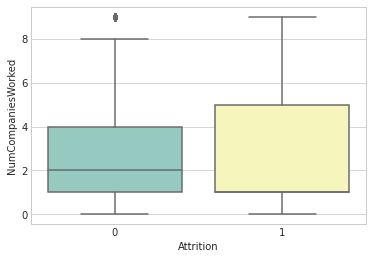

In [37]:
numerical_column_viz('NumCompaniesWorked')

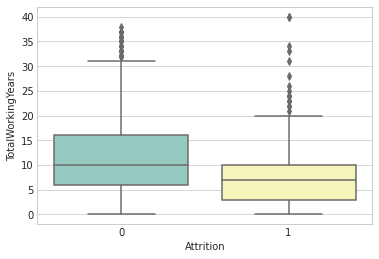

In [38]:
numerical_column_viz('TotalWorkingYears')

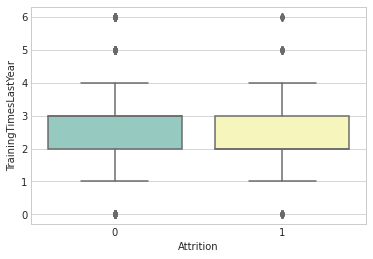

In [39]:
numerical_column_viz('TrainingTimesLastYear')

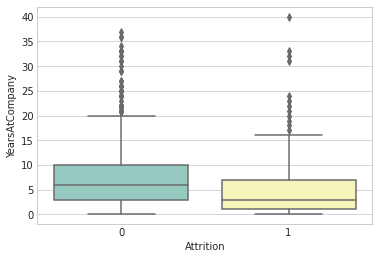

In [40]:
numerical_column_viz('YearsAtCompany')

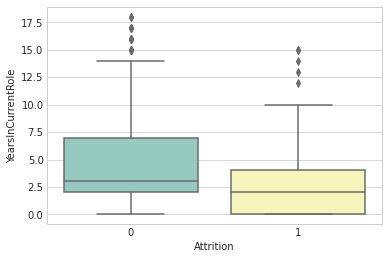

In [41]:
numerical_column_viz('YearsInCurrentRole')

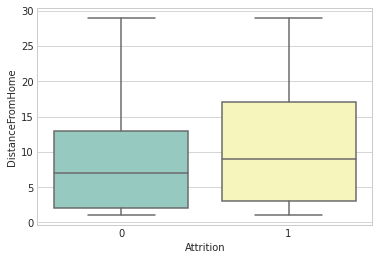

In [42]:
numerical_column_viz('DistanceFromHome')

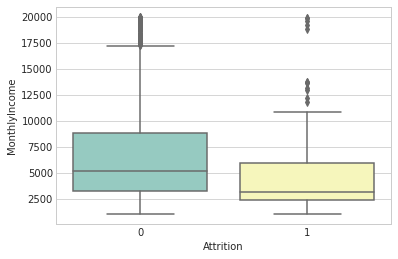

In [43]:
numerical_column_viz('MonthlyIncome')

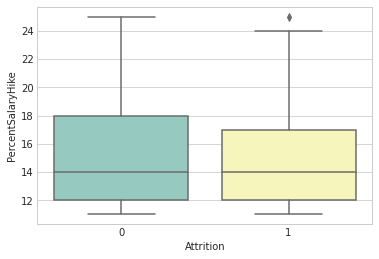

In [44]:
numerical_column_viz('PercentSalaryHike')

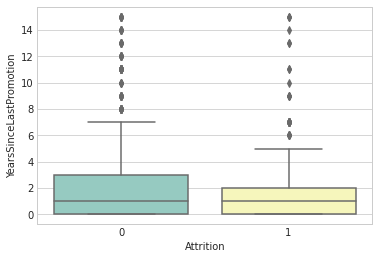

In [45]:
numerical_column_viz('YearsSinceLastPromotion')

### Feature importance
#### Chi sq for categorical variable , Logit model for numeric & categorical

In [46]:
#Columns with string values
categorical_column = [ 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [47]:
Cat_df = df[categorical_column]

In [48]:
Cat_df

,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,EducationField
0,2,2,0,7,2,1,1
1,1,1,1,6,1,0,1
2,2,1,1,2,2,1,4
3,1,1,0,6,1,1,1
4,2,1,1,2,1,0,3
...,...,...,...,...,...,...,...
1465,1,1,1,2,1,0,3
1466,2,1,1,0,1,0,3
1467,2,1,1,4,1,1,1
1468,1,2,1,7,1,0,3


In [49]:
from sklearn.feature_selection import SelectKBest, chi2

In [52]:
chi2_features = SelectKBest(chi2, k = 4) 
X_kbest_features = chi2_features.fit_transform(Cat_df, df['Attrition'])
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,Cat_df.columns):
  if bool:
    new_feature.append(feature)
list3=new_feature
list3

['Department', 'JobRole', 'MaritalStatus', 'OverTime']

#### significant categorical feature with correlation with Attrition

In [64]:
print(list3)

['Department', 'JobRole', 'MaritalStatus', 'OverTime']


In [53]:
print(len(Cat_df))
print(len(df['Attrition']))

1470
1470


In [54]:
import statsmodels.api as sm
logit_model=sm.Logit(df['Attrition'],Cat_df)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.439182
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.006    
Dependent Variable: Attrition        AIC:              1305.1949
Date:               2022-11-20 04:57 BIC:              1342.2460
No. Observations:   1470             Log-Likelihood:   -645.60  
Df Model:           6                LL-Null:          -649.29  
Df Residuals:       1463             LLR p-value:      0.28647  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
BusinessTravel   -0.6086   0.0831 -7.3276 0.0000 -0.7714 -0.4458
Department       -0.5462   0.1637 -3.3365 0.0008 -0.8671 -0.2254
Gender       

In [55]:
y=df['Attrition']
X=df.drop(['Attrition'],axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [57]:
logit_model_1=sm.Logit(y_train,X_train)
result=logit_model_1.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.317413
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.265     
Dependent Variable:    Attrition          AIC:                713.2369  
Date:                  2022-11-20 05:02   BIC:                861.3272  
No. Observations:      1029               Log-Likelihood:     -326.62   
Df Model:              29                 LL-Null:            -444.65   
Df Residuals:          999                LLR p-value:        2.5187e-34
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Age                      -0.0272   0.0151 -1.8029 0

In [58]:
feature_df =  result.summary2().tables[1]

In [59]:
feature_df = feature_df[(feature_df['P>|z|'] <0.05)]

In [60]:
feature_df.iloc[:,0]

Department                 0.780707
DistanceFromHome           0.046528
EnvironmentSatisfaction   -0.368342
Gender                     0.414782
JobInvolvement            -0.367686
JobSatisfaction           -0.224089
MaritalStatus              0.578621
NumCompaniesWorked         0.127272
OverTime                   1.719651
WorkLifeBalance           -0.331013
YearsAtCompany             0.099699
YearsInCurrentRole        -0.137889
YearsSinceLastPromotion    0.152950
YearsWithCurrManager      -0.160643
Name: Coef., dtype: float64

In [61]:
feature_df = feature_df.reset_index()

In [62]:
feature_df = feature_df.rename(columns={'index':'Variable'})

#### Significant feature that has correlation with attrition

In [63]:
feature_df.Variable.to_list()

['Department',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [3]:
import sys
 
 
print("User Current Version:-", sys.version)

User Current Version:- 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
